In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# from tensorflow.examples.tutorials.mnist import input_data

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(2944, 4632)

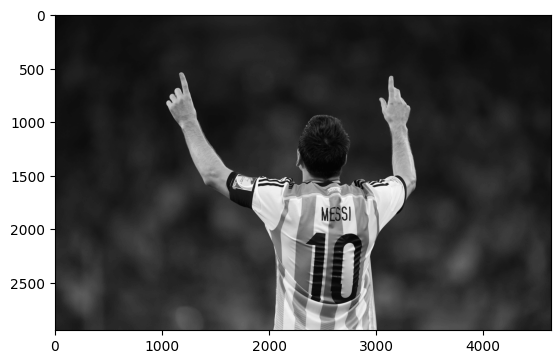

In [2]:
# Reading an image
img = cv2.imread('messi.jpeg',cv2.IMREAD_GRAYSCALE)/255
plt.imshow(img,cmap='gray')
img.shape

In [9]:
class convolution_operations:

    def __init__(self, num_filters, filter_size):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.conv_filter = np.random.randn(num_filters,filter_size,filter_size)/(filter_size*filter_size)

    def image_region(self, image):
        height , width = image.shape
        self.image = image
        for j in range(height - self.filter_size + 1):
            for k in range(width - self.filter_size + 1):
                image_patch = image[ j : (j+self.filter_size), k : (k+self.filter_size)]
                yield image_patch, j, k

    def forward_propogation(self, image):
        height , width = image.shape
        conv_out = np.zeros((height - self.filter_size + 1, width - self.filter_size + 1, self.num_filters))
        for image_patch, i, j in self.image_region(image):
            conv_out[i,j] = np.sum(image_patch*self.conv_filter, axis = (1,2))
        return conv_out
        
    def backward_propogation(self, dL_dout, learning_rate):
        dL_dF_params = np.zeros(self.conv_filter.shape)
        for image_patch, i, j in self.image_region(self.image):
            for k in range(self.num_filters):
                dL_dF_params[k] += image_patch*dL_dout[i,j,k]
        self.conv_filter -= learning_rate*dL_dF_params
        return dL_dF_params

In [10]:
conn = convolution_operations(18,7)
out = conn.forward_propogation(img)
out.shape

(2938, 4626, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

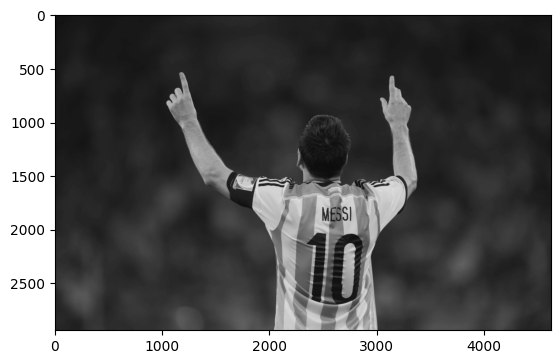

In [18]:
plt.imshow(out[:,:,16], cmap='gray')
plt.show